In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import seaborn as sns
import lec7_graphs as gfx
import warnings
warnings.filterwarnings(action="ignore")
plt.style.use('seaborn')

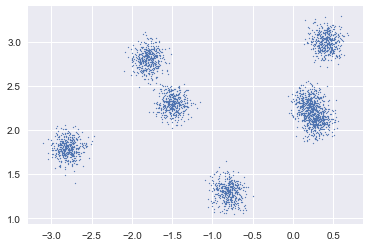

In [3]:
# importamos make_blobs
from sklearn.datasets import make_blobs
# Definimos los centros
bivariate_mu_params = list([[ 0.2, 2.3], [-1.5 , 2.3], [-2.8, 1.8], [-1.8, 2.8],
                        [-.8, 1.3],[.3, 2.1], [.4, 3]])
# Definimos las varianzas
bivariate_sigma_params = list([0.1, 0.1, 0.1, 0.1, 0.1, .1, .1])
X_mat, y_vec = make_blobs(n_samples=3000, centers=bivariate_mu_params,
cluster_std=bivariate_sigma_params, random_state=11238)
plt.scatter(X_mat[:, 0], X_mat[:, 1], s=1)
 

In [5]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=7, random_state=11238)
fit_results = kmeans.fit_predict(X_mat)

In [6]:
kmeans.labels_

array([3, 5, 6, ..., 6, 6, 1], dtype=int32)

In [7]:
pd.Series(kmeans.labels_).value_counts('%')

1    0.144000
0    0.143667
2    0.143000
3    0.142667
4    0.142667
5    0.142333
6    0.141667
dtype: float64

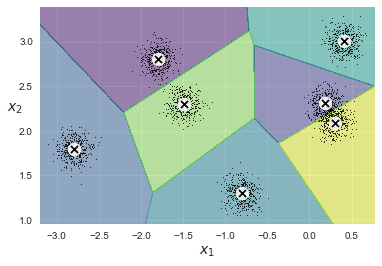

In [8]:
gfx.plot_decision_boundaries(kmeans,X_mat)

In [9]:
kmeans.inertia_

56.260957408127865

Text(0, 0.5, 'Inercia estimada')

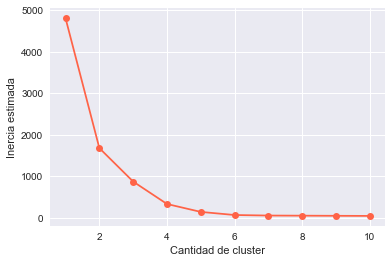

In [13]:
inertia = []

for i in range(1,11):
    inertia.append(KMeans(n_clusters=i, random_state=11238).fit(X_mat).inertia_)
plt.plot(range(1,11), inertia, 'o-', color='tomato')
plt.xlabel('Cantidad de cluster')
plt.ylabel('Inercia estimada')

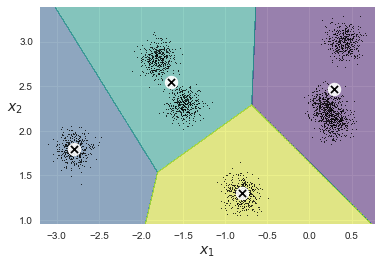

In [16]:
kmeans = KMeans(n_clusters=4, random_state=11238)
fit_results = kmeans.fit_predict(X_mat)
gfx.plot_decision_boundaries(kmeans,X_mat)

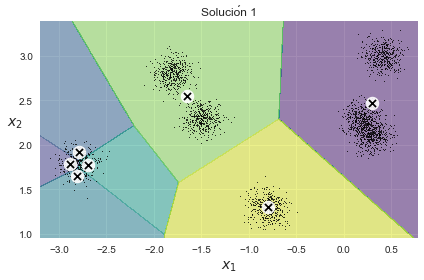

In [19]:
init_1 = KMeans(n_clusters=7, random_state=5342, init="random", n_init=1) 
init_1.fit(X_mat)
init_2 = KMeans(n_clusters=7, random_state=138, init="random", n_init=1) 
init_2.fit(X_mat)
gfx.plot_decision_boundaries(init_1, X_mat) 
plt.title('Solución 1')
plt.tight_layout()

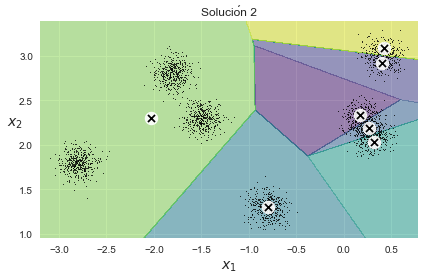

In [20]:
plt.title('Solución 2') 
gfx.plot_decision_boundaries(init_2, X_mat) 
plt.tight_layout()